In [ ]:
#support vector machine
it is supervised machine algorithem
An SVM finds the best boundary (like a line) to split data into two groups.


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(X_pca, y)


DecisionBoundaryDisplay.from_estimator(
    svm,
    X_pca,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.6,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2'
)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=15, edgecolors="k", cmap=plt.cm.tab10)
plt.title("SVM Decision Boundary on Digits Dataset (2D PCA projection)")
plt.show()

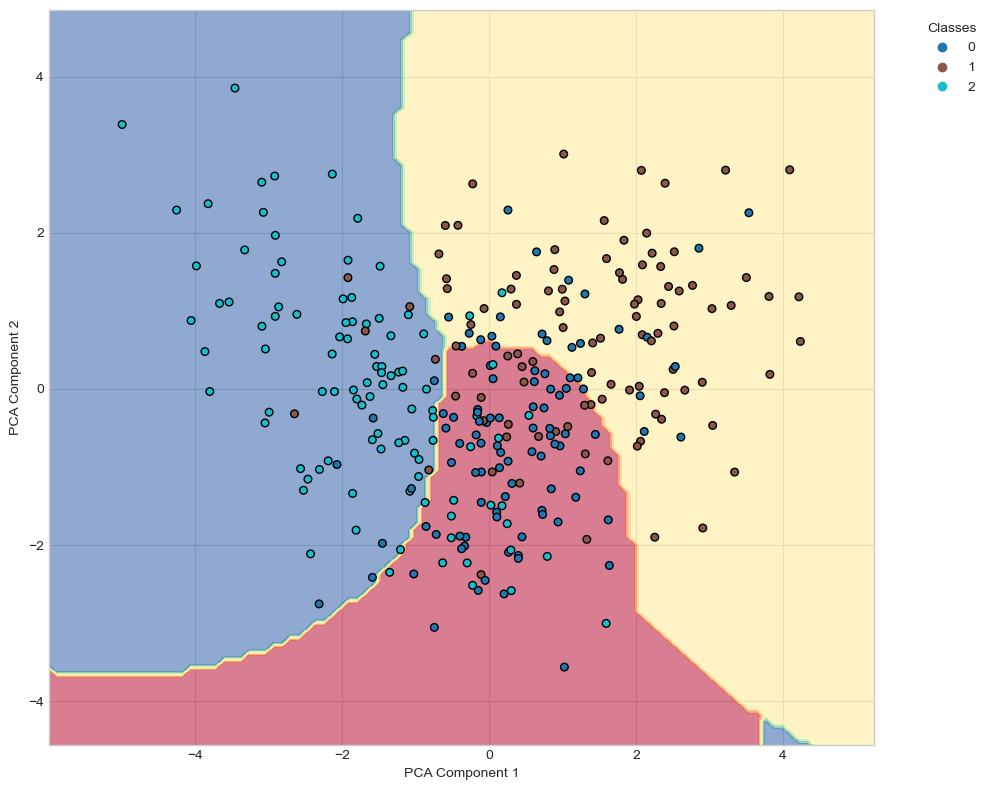

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Generate synthetic classification data
X, y = make_classification(
    n_samples=300, n_features=10, n_informative=5, n_redundant=2,
    n_clusters_per_class=1, n_classes=3, random_state=42
)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Train SVM with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.5, 0.1]}
svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)
svm.fit(X_pca, y)

# 5. Plot decision boundary
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
disp = DecisionBoundaryDisplay.from_estimator(
    svm.best_estimator_,
    X_pca,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.6,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2',
    ax=ax
)

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, s=30, edgecolors="k", cmap=plt.cm.tab10
)
legend = ax.legend(
    *scatter.legend_elements(),
    title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.tight_layout()
plt.show()


Best SVR parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 0.1}


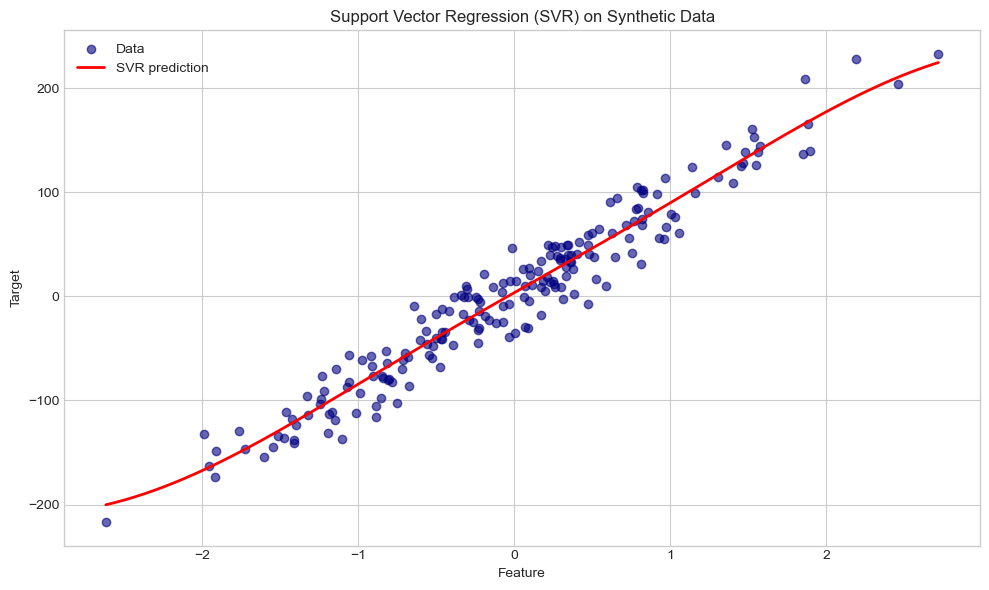

In [3]:
#using svm solve a regression problem 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 1. Generate synthetic regression data
X, y = make_regression(
    n_samples=200,
    n_features=1,
    noise=20,
    random_state=42
)

# 2. Standardize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# 3. Train SVR with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.5, 0.1], 'epsilon': [0.1, 0.2, 0.5]}
svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3)
svr.fit(X_scaled, y_scaled)
print("Best SVR parameters:", svr.best_params_)

# 4. Predict over a grid for smooth curve
X_test = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 5. Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='navy', label='Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', lw=2, label='SVR prediction')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Support Vector Regression (SVR) on Synthetic Data")
plt.legend()
plt.tight_layout()
plt.show()


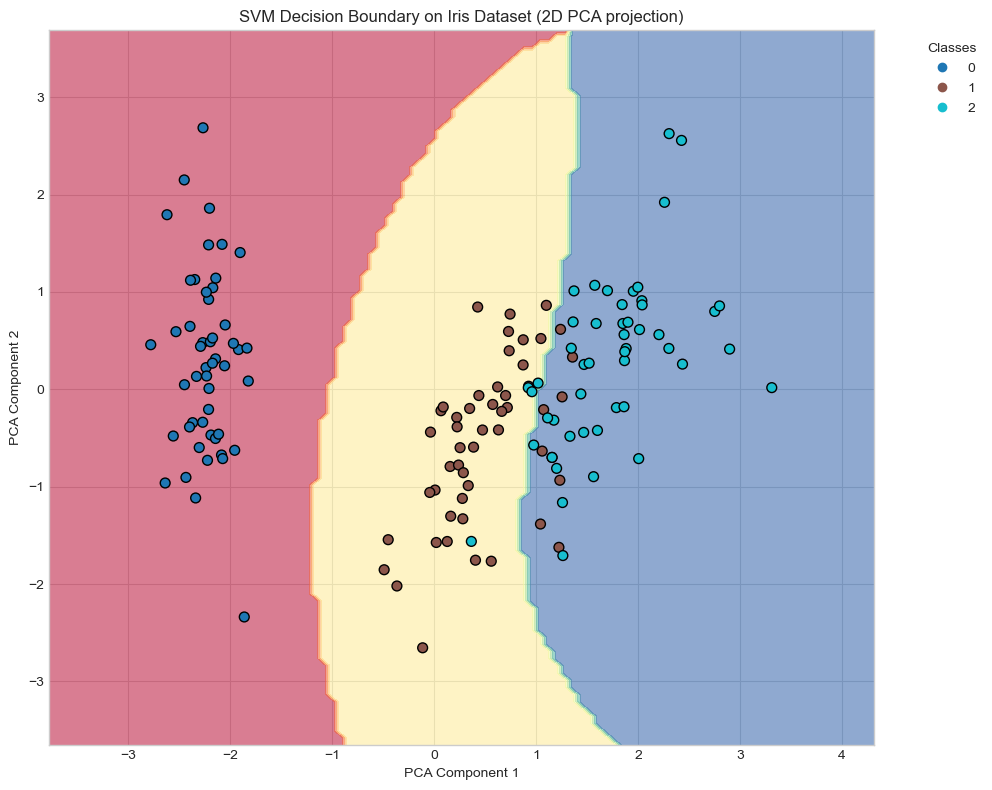

In [5]:
##using svm solve a classification problem 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Train SVM with RBF kernel and hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.5, 0.1]}
svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)
svm.fit(X_pca, y)

# 5. Plot decision boundaries
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    svm.best_estimator_,
    X_pca,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.6,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2',
    ax=ax
)
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, s=50, edgecolors="k", cmap=plt.cm.tab10
)
legend = ax.legend(
    *scatter.legend_elements(),
    title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.title("SVM Decision Boundary on Iris Dataset (2D PCA projection)")
plt.tight_layout()
plt.show()
